In [1]:
import seaborn as sns
from pickle_cache import PickleCache
import matplotlib.pyplot as plt
import pandas as pd
pcache = PickleCache()

In [2]:
(nn_acc_many, rnn_acc_many) = pcache.get('tmp')

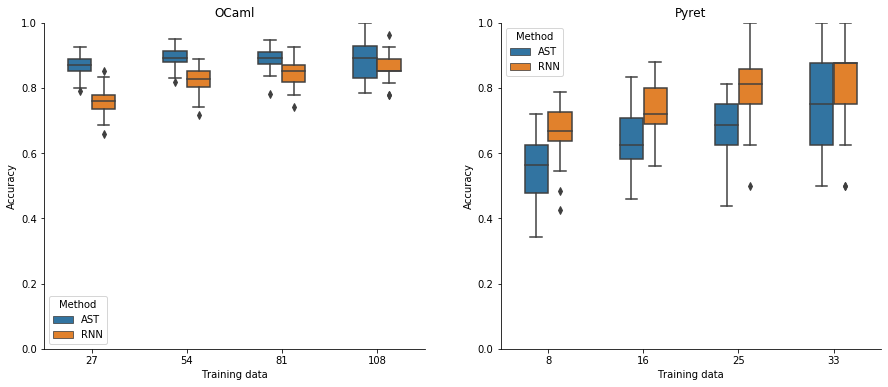

In [26]:
palette = sns.color_palette()
val_fracs = [0.2, 0.4, 0.6, 0.8]
methods = {
    'AST': nn_acc_many, 
    'RNN': rnn_acc_many
}

_, axes = plt.subplots(ncols=2, figsize=(15, 6))
for ax, lang, size in zip(axes, ['T1', 'T1Acc'], [136, 42]):
    df = pd.DataFrame([{'Training data': int((1-f) * size), 'Accuracy': x, 'Method': method} 
                        for method in methods.keys() for f, l in zip(val_fracs, methods[method][lang]) for x in l])
    sns.boxplot(x='Training data', y='Accuracy', hue='Method', data=df, ax=ax, width=0.5)
    sns.despine()
    ax.set_title('OCaml' if lang == 'T1' else 'Pyret')
    ax.set_ylim(0, 1.0)


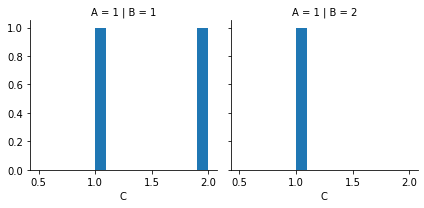

In [39]:
df = pd.DataFrame([{'A': 1, 'B': 1, 'C': 1}, {'A': 1, 'B': 1, 'C': 2}, {'A': 1, 'B': 2, 'C': 1}])
g = sns.FacetGrid(df, row='A', col='B')
g.map(plt.hist, 'C')